## GANITE(PyTorch): Train and Evaluation

This notebook presents the solution for training and evaluating GANITE(PyTorch version).

The implementation of GANITE is adapted in the local `ite` library.

First, make sure that all the depends are installed.
```
pip install -r requirements.txt
pip install .
```

### Setup

First, we import all the dependencies necessary for the task.

In [1]:
# Double check that we are using the correct interpreter.
import sys
print(sys.executable)
    
# Import depends
import ite.algs.ganite_torch.model as alg
import ite.datasets as ds
import ite.utils.numpy as utils

from matplotlib import pyplot as plt
import torch
import pandas as pd

/home/bcebere/anaconda3/envs/cambridge/bin/python
Instructions for updating:
non-resource variables are not supported in the long term


### Load the Dataset



In [2]:
train_ratio = 0.8
 
dataset = ds.load("twins", train_ratio)
[Train_X, Train_T, Train_Y, Opt_Train_Y, Test_X, Test_Y] = dataset

pd.DataFrame(data=Train_X[:5])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,17.0,1.0,27.0,25.0,11.0,2.0,1.0,5.0,5.0,2.0
1,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,32.0,1.0,35.0,33.0,12.0,1.0,2.0,3.0,10.0,1.0
2,4.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,25.0,1.0,28.0,28.0,12.0,2.0,1.0,3.0,6.0,1.0
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,15.0,1.0,27.0,18.0,10.0,1.0,1.0,2.0,5.0,1.0
4,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,15.0,1.0,28.0,24.0,12.0,2.0,1.0,1.0,4.0,2.0


### Load the model

In [3]:
dim = len(Train_X[0])
dim_hidden = 8
dim_outcome = Test_Y.shape[1]
 
model = alg.GaniteTorch(
    dim, # number of features
    dim_outcome, # size of the output
    dim_hidden=dim_hidden, # (optional) size of the hidden layers
    num_iterations=5000, # (optional) number of training iterations
    alpha=2, # (optional) alpha hyperparameter, used for the Generator block loss
    beta=2, # (optional) beta hyperparameter, used for the ITE block loss
    minibatch_size=128, # (optional) data batch size
    num_discr_iterations=5, # (optional) number of iterations executed by the discriminator
    depth=1, # (optional) the depth of the linear layers in each internal model
)

assert model is not None

### Train

In [4]:
metrics = model.train(*dataset)

100%|██████████| 5000/5000 [00:16<00:00, 307.61it/s]


### Plot train metrics

Counterfactual Block:
 - Discriminator loss: 0.693 +/- 0.001
 - Generator loss: -1.367 +/- 0.022
ITE Block:
 - ITE loss: 0.247 +/- 0.031
ITE Block in-sample metrics:
 - sqrt_PEHE: 0.293 +/- 0.001
 - ATE: 0.006 +/- 0.008
ITE Block out-sample metrics:
 - sqrt_PEHE: 0.291 +/- 0.001
 - ATE: 0.010 +/- 0.007


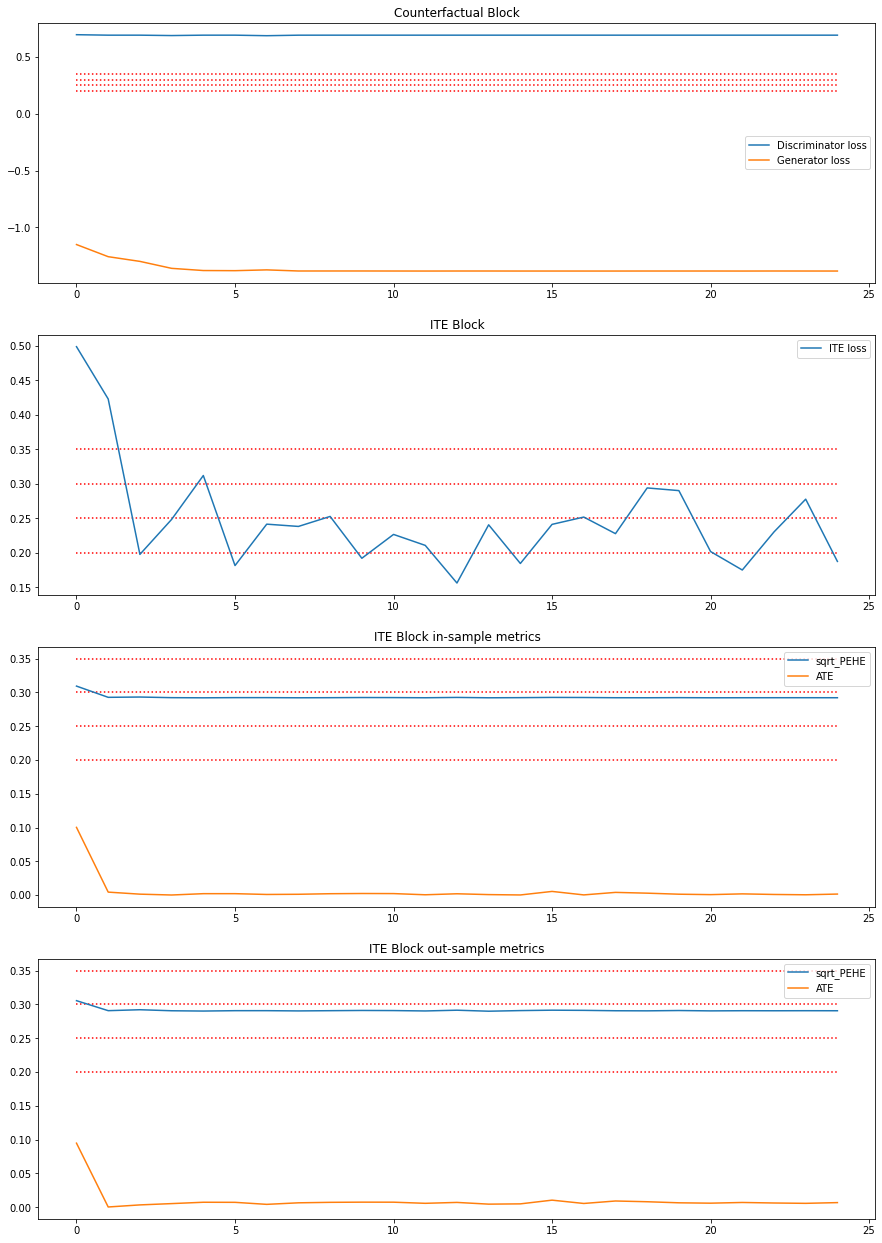

In [5]:
metrics.print()

metrics.plot(plt, thresholds = [0.2, 0.25, 0.3, 0.35])

### Predict

In [6]:
hat_y = model.predict(Test_X)

utils.sqrt_PEHE(hat_y.to_numpy(), Test_Y)

0.2907799187800156

### Test
Will can run inferences and get metrics directly

In [7]:
test_metrics = model.test(Test_X, Test_Y)

test_metrics.print()

sqrt_PHE = 0.291
ATE = 0.006
Top 5 worst mistakes(indices) = [ 972 1797  903 2260 1067]
